## 0. Reference

* [(Paper) Estimating Contextual Situations Using Indicators from Smartphone Sensor Values](https://ieeexplore.ieee.org/document/7059668)
* [From Scratch: Bayesian Inference, Markov Chain Monte Carlo and Metropolis Hastings, in python](https://nbviewer.jupyter.org/github/Joseph94m/MCMC/blob/master/MCMC.ipynb)
* [Particle Filters](https://nbviewer.jupyter.org/github/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/12-Particle-Filters.ipynb)
* [機率圖模型 -- Metropolis Hasting](http://cpmarkchang.logdown.com/posts/737249-pgm-metropolis-hasting)

In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

%matplotlib inline

## 1. Kernel Density Estimation

smooth parameter 或 bandwidth 基於經驗法則，$h=(4\sigma^5/3n)^{1/5}$

才會產生相對平滑的 KDE

In [2]:
test = np.random.normal(100, 20, 300)[:, np.newaxis]
h = (4/3*np.std(test)**5/len(test))**(1/5)
h

6.595401252113406

In [3]:
kde1 = KernelDensity(kernel='gaussian', bandwidth=1).fit(test)
kde2 = KernelDensity(kernel='gaussian', bandwidth=2).fit(test)
kde3 = KernelDensity(kernel='gaussian', bandwidth=h).fit(test)

density1 = np.exp(kde1.score_samples(test))
density2 = np.exp(kde2.score_samples(test))
density3 = np.exp(kde3.score_samples(test))

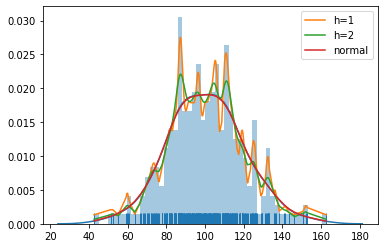

In [4]:
sb.distplot(test[:, 0], rug=True, bins=50)
sb.lineplot(test[:, 0], density1, label='h=1')
sb.lineplot(test[:, 0], density2, label='h=2')
sb.lineplot(test[:, 0], density3, label='normal')

In [5]:
def build_kde(data):
    data = data[:, np.newaxis]
    h = (4/3*np.std(data)**5/len(data))**(1/5)
    return KernelDensity(kernel='gaussian', bandwidth=h).fit(data)

## 2. Model

只考慮四個主要的 sensor，建模固定採樣 300 點

In [6]:
n_samples = 300
sensor = ['light', 'sound', 'time', 'orientY']

### Kitchen

In [7]:
# cook
light = np.random.normal(200, 20, n_samples)
sound = np.random.normal(60, 20, n_samples)
time_category = [16, 17, 18, 19]
time = np.random.choice(time_category, n_samples)
orientY = np.random.normal(90, 10, n_samples)
cook = dict(light=light, sound=sound, time=time, orientY=orientY)
cook_kde = dict(light=build_kde(light), sound=build_kde(sound), time=build_kde(time), orientY=build_kde(orientY))

In [8]:
# clean
light = np.random.normal(200, 20, n_samples)
sound = np.random.normal(80, 20, n_samples)
time_category = [19, 20]
time = np.random.choice(time_category, n_samples)
orientY = np.random.normal(90, 10, n_samples)
clean = dict(light=light, sound=sound, time=time, orientY=orientY)
clean_kde = dict(light=build_kde(light), sound=build_kde(sound), time=build_kde(time), orientY=build_kde(orientY))

### Bedroom

In [9]:
# sleep
light = np.random.normal(20, 5, n_samples)
sound = np.random.normal(30, 10, n_samples)
time_category = [22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8]
time = np.random.choice(time_category, n_samples)
orientY = np.random.normal(0, 5, n_samples)
sleep = dict(light=light, sound=sound, time=time, orientY=orientY)
sleep_kde = dict(light=build_kde(light), sound=build_kde(sound), time=build_kde(time), orientY=build_kde(orientY))

In [10]:
# study
light = np.random.normal(100, 20, n_samples)
sound = np.random.normal(50, 10, n_samples)
time_category = [18, 19, 20]
time = np.random.choice(time_category, n_samples)
orientY = np.random.normal(0, 10, n_samples)
study = dict(light=light, sound=sound, time=time, orientY=orientY)
study_kde = dict(light=build_kde(light), sound=build_kde(sound), time=build_kde(time), orientY=build_kde(orientY))

### Living Room

In [11]:
# tv
light = np.random.normal(300, 20, n_samples)
sound = np.random.normal(80, 30, n_samples)
time_category = [17, 18, 19, 20, 21, 22, 23]
time = np.random.choice(time_category, n_samples)
orientY = np.random.normal(0, 10, n_samples)
tv = dict(light=light, sound=sound, time=time, orientY=orientY)
tv_kde = dict(light=build_kde(light), sound=build_kde(sound), time=build_kde(time), orientY=build_kde(orientY))

In [12]:
# eat
light = np.random.normal(200, 20, n_samples)
sound = np.random.normal(70, 10, n_samples)
time_category = [7, 8, 12, 13, 18, 19]
time = np.random.choice(time_category, n_samples)
orientY = np.random.normal(90, 10, n_samples)
eat = dict(light=light, sound=sound, time=time, orientY=orientY)
eat_kde = dict(light=build_kde(light), sound=build_kde(sound), time=build_kde(time), orientY=build_kde(orientY))

### Model KDE

同地點的比較

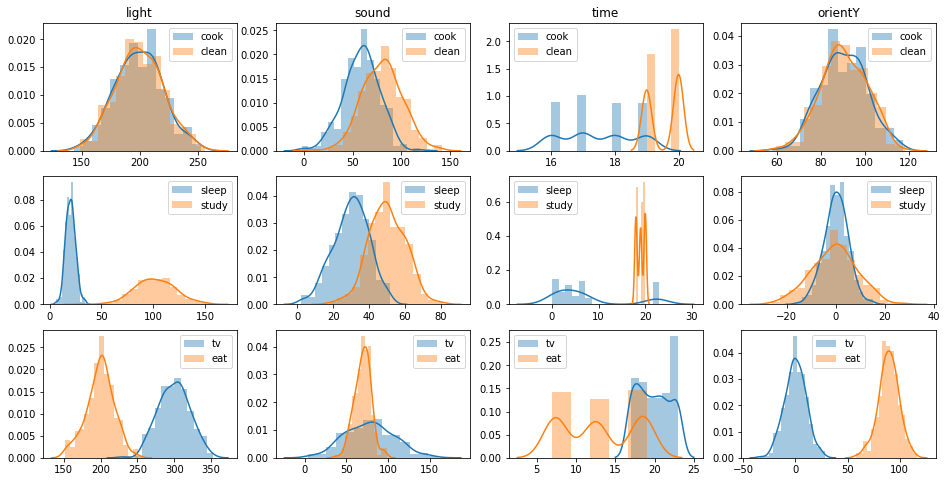

In [13]:
fig, ax = plt.subplots(3, 4, figsize=(16, 8))

for i in range(len(sensor)):
    # kitchen
    ax[0, i].set_title(sensor[i])
    sb.distplot(cook[sensor[i]], ax=ax[0, i], label='cook')
    sb.distplot(clean[sensor[i]], ax=ax[0, i], label='clean')
    ax[0, i].legend()
    # bedroom
    sb.distplot(sleep[sensor[i]], ax=ax[1, i], label='sleep')
    sb.distplot(study[sensor[i]], ax=ax[1, i], label='study')
    ax[1, i].legend()
    # living room
    sb.distplot(tv[sensor[i]], ax=ax[2, i], label='tv')
    sb.distplot(eat[sensor[i]], ax=ax[2, i], label='eat')
    ax[2, i].legend()

不同地點的比較

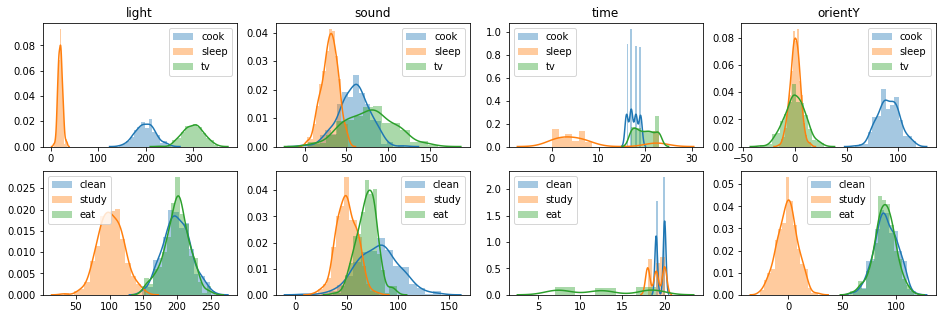

In [14]:
fig, ax = plt.subplots(2, 4, figsize=(16, 5))

for i in range(len(sensor)):
    ax[0, i].set_title(sensor[i])
    sb.distplot(cook[sensor[i]], ax=ax[0, i], label='cook')
    sb.distplot(sleep[sensor[i]], ax=ax[0, i], label='sleep')
    sb.distplot(tv[sensor[i]], ax=ax[0, i], label='tv')
    ax[0, i].legend()
    sb.distplot(clean[sensor[i]], ax=ax[1, i], label='clean')
    sb.distplot(study[sensor[i]], ax=ax[1, i], label='study')
    sb.distplot(eat[sensor[i]], ax=ax[1, i], label='eat')
    ax[1, i].legend()

不同情境的比較

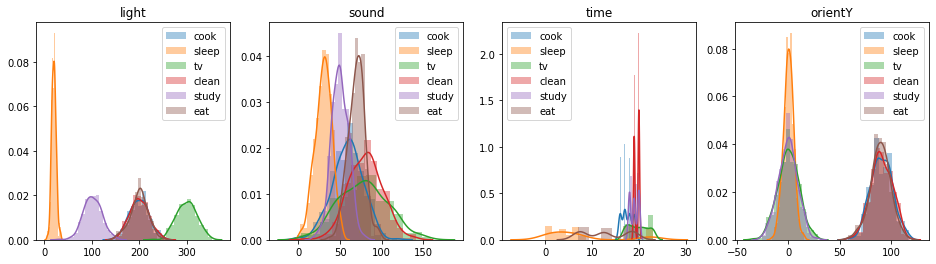

In [15]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

for i in range(len(sensor)):
    ax[i].set_title(sensor[i])
    sb.distplot(cook[sensor[i]], ax=ax[i], label='cook')
    sb.distplot(sleep[sensor[i]], ax=ax[i], label='sleep')
    sb.distplot(tv[sensor[i]], ax=ax[i], label='tv')
    sb.distplot(clean[sensor[i]], ax=ax[i], label='clean')
    sb.distplot(study[sensor[i]], ax=ax[i], label='study')
    sb.distplot(eat[sensor[i]], ax=ax[i], label='eat')
    ax[i].legend()

## 3. Estimation

假設馬克夫鏈：廚房 <-> 客廳 <-> 臥室


可到達的情境機率相同：$1/(walkable\ situation)$

In [16]:
model = dict(cook=cook_kde, clean=clean_kde, sleep=sleep_kde, study=study_kde, tv=tv_kde, eat=eat_kde)

In [17]:
situation = ['cook', 'clean', 'sleep', 'study', 'tv', 'eat']
markov = {
    'cook': ['clean', 'tv', 'eat'],
    'clean': ['cook', 'tv', 'eat'],
    'tv': ['clean', 'cook', 'eat', 'sleep', 'study'],
    'eat': ['clean', 'cook', 'tv', 'sleep', 'study'],
    'sleep': ['study', 'tv', 'eat'],
    'study': ['sleep', 'tv', 'eat']
}

### Metropolis Hasting

在此亂數取可能的情境即可

In [18]:
def draw_situation(curr_situation):
    proposal = np.random.choice(markov[curr_situation], 1)[0] # 取值
#     alpha = min(1, 1/len(markov[curr_situation])) # acceptance probability
# #     隨機亂數並比較 alpha，小於即改變狀態
#     if np.random.rand() <= alpha:
#         curr_situation = proposal
#     return curr_situation
    return proposal

### Test Data

此模擬睡眠的感測資料，採樣 10 個

In [19]:
# 轉二維
def sleep_data(n_samples):
    light = np.random.normal(20, 5, n_samples)[:, np.newaxis]
    sound = np.random.normal(30, 10, n_samples)[:, np.newaxis]
    time_category = [22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8]
    time = np.random.choice(time_category, n_samples)[:, np.newaxis]
    orientY = np.random.normal(0, 5, n_samples)[:, np.newaxis]
    return dict(light=light, sound=sound, time=time, orientY=orientY)

In [20]:
test_data = sleep_data(10)

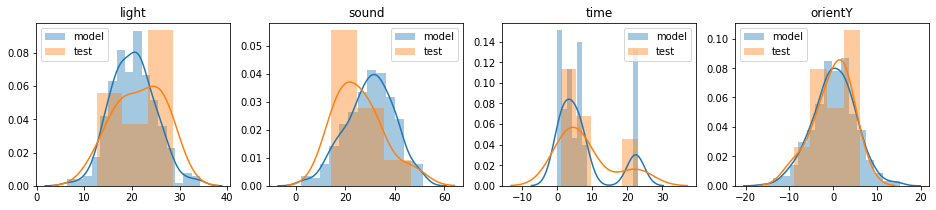

In [21]:
fig, ax = plt.subplots(1, 4, figsize=(16, 3))

for i in range(len(sensor)):
    # sleep
    ax[i].set_title(sensor[i])
    sb.distplot(sleep[sensor[i]], ax=ax[i], label='model')
    sb.distplot(test_data[sensor[i]], ax=ax[i], label='test')
    ax[i].legend()

### Weighting

個別 sensor 權重：$w^{sensor}_{t}=p(d_{value}|m)$，由當前 sensor 資訊計算


particle 權重：$w^{situation}_{t}\ {\propto}\ w^{situation}_{t-1}*{\prod}w^{sensor}_{t}$

In [22]:
def compute_particle_weight(test_data, curr_situation, particle_weight):
    curr_model = model[curr_situation]
    sensor_weight = 0
    # 計算全部 sensor 權重
    for i, curr_sensor in enumerate(sensor):
        # 計算個別 sensor 的 log density 取平均後相加
        log_score = np.mean(curr_model[curr_sensor].score_samples(test_data[curr_sensor]))
        sensor_weight = sensor_weight + log_score
    # 計算 particle 權重，越不像者 sensor_weight 負越大 (log)
    particle_weight = particle_weight * sensor_weight
    return particle_weight

In [23]:
compute_particle_weight(test_data, 'tv', 1/10)

-57.47325786803149

### Particle Filter

<img src="https://i.imgur.com/SAhXblu.png" width="30%" align="left"/>

In [24]:
def particle_filter(n_particles, Smin, rounds, test_data, curr_situation, debug):
    all_weight = np.full(n_particles, 1/n_particles)
    all_situation = [curr_situation] * n_particles
    best_situation = curr_situation
    Sbest = 1
    resample_freq = 0
    for n in range(rounds):
        # 抽選情境並計算權重
        for i in range(n_particles):
            all_situation[i] = draw_situation(all_situation[i])
            all_weight[i] = compute_particle_weight(test_data, all_situation[i], all_weight[i])

        # 標準化，補回負
        all_weight = - all_weight / np.sum(all_weight) 
        # 有效粒子數，越小表示退化嚴重
        # 但如果負得大的數越多，也會導致有效粒子數變高，有點難解
        Seff = 1/np.sum(all_weight**2)
        
        high_situation = all_situation[np.argmax(all_weight)]
        if Seff > Sbest:
            best_situation = high_situation
            Sbest = Seff

        if debug:
            print(Seff, Sbest, high_situation)
            print(all_weight)
            print(all_situation)

        # 重採樣
        if Seff < Smin and n < rounds:
            for i in range(n_particles):
                if i <= n_particles/2:
                    all_situation[i] = high_situation
                else:
                    all_situation[i] = draw_situation(all_situation[i])
            # 全部 particle 權重設為一樣
            all_weight = np.full(n_particles, 1/n_particles)
            resample_freq = resample_freq + 1
        else:
            return best_situation, resample_freq
    return best_situation, resample_freq

In [25]:
particle_filter(10, 4, 3, test_data, 'tv', 1)

4.070464778834783 4.070464778834783 sleep
[-0.28138049 -0.28138049 -0.05941925 -0.05941925 -0.03288908 -0.00103274
 -0.28138049 -0.00103274 -0.00103274 -0.00103274]
['clean', 'clean', 'cook', 'cook', 'eat', 'sleep', 'clean', 'sleep', 'sleep', 'sleep']


('sleep', 0)

## Simulation

In [26]:
def simulation(sim_times, n_particles, Smin, rounds, test_data, curr_situation, truth):
    ans = []
    resample = []
    for i in range(sim_times):
        result = particle_filter(n_particles, Smin, rounds, test_data, curr_situation, 0)
        ans = ans + [result[0]]
        resample = resample + [result[1]]
    accuracy = ans.count(truth) / len(ans)
    frequency = np.mean(resample)
    print(f'predict: {ans}')
    print(f'accuracy: {accuracy}', f'resample frequency: {frequency}')

測試皆執行 20 次觀察

ground truth 皆為 sleep

從可到達的情境出發


對 sleep 來說即是 study、tv、eat

In [27]:
curr_situation = 'tv'
sim_times = 20

In [28]:
simulation(sim_times, 10, 2, 3, test_data, curr_situation, 'sleep')
simulation(sim_times, 10, 4, 3, test_data, curr_situation, 'sleep')
simulation(sim_times, 10, 6, 3, test_data, curr_situation, 'sleep')

predict: ['sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'eat', 'sleep', 'sleep', 'sleep', 'eat', 'sleep', 'sleep', 'sleep', 'sleep', 'eat']
accuracy: 0.85 resample frequency: 0.0
predict: ['sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'eat', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep']
accuracy: 0.95 resample frequency: 0.2
predict: ['sleep', 'sleep', 'eat', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'eat', 'sleep', 'sleep', 'eat', 'sleep', 'eat', 'eat', 'sleep', 'eat', 'sleep', 'eat', 'eat']
accuracy: 0.6 resample frequency: 1.45


In [29]:
simulation(sim_times, 30, 6, 6, test_data, curr_situation, 'sleep')
simulation(sim_times, 30, 12, 6, test_data, curr_situation, 'sleep')
simulation(sim_times, 30, 18, 6, test_data, curr_situation, 'sleep')

predict: ['sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep']
accuracy: 1.0 resample frequency: 0.0
predict: ['sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep']
accuracy: 1.0 resample frequency: 0.15
predict: ['sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'eat', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'eat', 'sleep', 'sleep']
accuracy: 0.9 resample frequency: 2.95


In [30]:
simulation(sim_times, 50, 10, 10, test_data, curr_situation, 'sleep')
simulation(sim_times, 50, 20, 10, test_data, curr_situation, 'sleep')
simulation(sim_times, 50, 30, 10, test_data, curr_situation, 'sleep')

predict: ['sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep']
accuracy: 1.0 resample frequency: 0.0
predict: ['sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep']
accuracy: 1.0 resample frequency: 0.1
predict: ['sleep', 'sleep', 'sleep', 'eat', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'eat', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep']
accuracy: 0.9 resample frequency: 5.35


從不合理的情境出發

對 sleep 來說即是 cook、clean

In [31]:
curr_situation = 'cook'

In [32]:
simulation(sim_times, 10, 2, 3, test_data, curr_situation, 'sleep')
simulation(sim_times, 10, 4, 3, test_data, curr_situation, 'sleep')
simulation(sim_times, 10, 6, 3, test_data, curr_situation, 'sleep')

predict: ['eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat']
accuracy: 0.0 resample frequency: 0.0
predict: ['eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'sleep', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat']
accuracy: 0.05 resample frequency: 0.05
predict: ['eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'sleep', 'sleep', 'tv', 'eat', 'sleep', 'eat', 'sleep', 'eat', 'tv', 'eat', 'eat', 'sleep', 'eat']
accuracy: 0.25 resample frequency: 1.75


In [33]:
simulation(sim_times, 30, 6, 6, test_data, curr_situation, 'sleep')
simulation(sim_times, 30, 12, 6, test_data, curr_situation, 'sleep')
simulation(sim_times, 30, 18, 6, test_data, curr_situation, 'sleep')

predict: ['eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat']
accuracy: 0.0 resample frequency: 0.0
predict: ['eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat']
accuracy: 0.0 resample frequency: 0.0
predict: ['sleep', 'sleep', 'eat', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'eat', 'eat', 'eat', 'eat', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'eat', 'sleep', 'sleep']
accuracy: 0.7 resample frequency: 3.75


In [34]:
simulation(sim_times, 50, 10, 10, test_data, curr_situation, 'sleep')
simulation(sim_times, 50, 20, 10, test_data, curr_situation, 'sleep')
simulation(sim_times, 50, 30, 10, test_data, curr_situation, 'sleep')

predict: ['eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat']
accuracy: 0.0 resample frequency: 0.0
predict: ['eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat', 'eat']
accuracy: 0.0 resample frequency: 0.0
predict: ['eat', 'sleep', 'sleep', 'sleep', 'eat', 'sleep', 'sleep', 'sleep', 'eat', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep', 'sleep']
accuracy: 0.85 resample frequency: 5.9


## Conclusion

在取權重的部分為配合 scikit-learn 的 KDE score，產生的 log density 可能與原文實作的方式會有些落差

但基本可以看得出來在可到達的情境下準確率是相當高的

反之從不合理的情境遊蕩到該情境的機率相對不容易，需要靠較高的 Smin 與重採樣才會接近 sleep，否則大多是相對類似的 eat